In [1]:
from tensorflow.keras.datasets import cifar10
# 載入 cifar10 資料集 50000張訓練資料 , 10000張測試資料, 每張大小為 32x32,3通道
(train_Data, train_Label), (test_Data, test_Label) = cifar10.load_data()
print("train_Data.shape",train_Data.shape)
print("train_Label.shape",train_Label.shape)
print("test_Data.shape",test_Data.shape)
print("test_Label.shape",test_Label.shape)

train_Data.shape (50000, 32, 32, 3)
train_Label.shape (50000, 1)
test_Data.shape (10000, 32, 32, 3)
test_Label.shape (10000, 1)


In [2]:
# 資料切割, 訓練資料的前面 5000 筆當作是驗證集, 剩下的為測試集
validation_data, validation_label = train_Data[:5000],train_Label[:5000]
train_Data,train_Label= train_Data[5000:],train_Label[5000:]
# 印出訓練資料與驗證資料大小
print("train_Data.shape",train_Data.shape)
print("validation_data.shape",validation_data.shape)

train_Data.shape (45000, 32, 32, 3)
validation_data.shape (5000, 32, 32, 3)


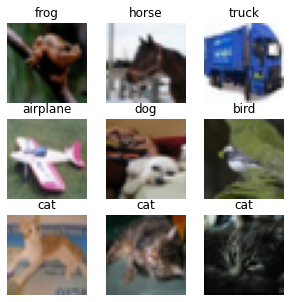

In [4]:
import matplotlib.pyplot as plt
import tensorflow as tf
CLASS_NAME=["airplane","automobile","bird","cat","deer",
            "dog","frog","horse","ship","truck"]
train_ds = tf.data.Dataset.from_tensor_slices((train_Data,train_Label))
test_ds = tf.data.Dataset.from_tensor_slices((test_Data, test_Label))
validation_ds = tf.data.Dataset.from_tensor_slices((validation_data,
                                                    validation_label))

plt.figure(figsize=(5,5))
# 顯示前九張資料影像
for i,(image,label) in enumerate(train_ds.take(9)):
    ax = plt.subplot(3,3,1+i)
    plt.imshow(image)
    plt.title(CLASS_NAME[label.numpy()[0]])
    plt.axis('off')
plt.show()

In [6]:
def preprocess(image, label):
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image,(227,227))
    return image,label

batch_size = 360
train_ds = train_ds.map(preprocess).shuffle(1000).batch(batch_size=batch_size)
# 驗證集與測試集資料不用打散
validation_ds = validation_ds.map(preprocess).batch(batch_size=batch_size)
test_ds = test_ds.map(preprocess).batch(batch_size=batch_size)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, \
    Flatten,BatchNormalization,Dropout

model = Sequential([
    # 第一層  卷積層 + BN 層 + 最大池化層
    Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),
           activation='relu',input_shape=(227,227,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3,3),strides=(2,2)),
    # 第二層  卷積層 + BN 層 + 最大池化層
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1),
           activation='relu',padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    # 第三層  卷積層 + BN 層
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1),
           activation='relu', padding='same'),
    BatchNormalization(),
    # 第四層  卷積層 + BN 層
    Conv2D(filters=384, kernel_size=(3, 3), strides=(1, 1),
           activation='relu', padding='same'),
    BatchNormalization(),
    # 第五層  卷積層 + BN 層 + 最大池化層
    Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1),
           activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(3, 3), strides=(2, 2)),
    Flatten(),     # 展開層
    Dense(4096,activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 55, 55, 96)        34944     
_________________________________________________________________
batch_normalization (BatchNo (None, 55, 55, 96)        384       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       8

In [8]:
# 編譯與訓練網路
model.compile(optimizer= 'adam',loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
History = model.fit(train_ds,epochs=30,validation_data=validation_ds,
                    validation_freq=1)

Epoch 1/30
125/125 [==============================] - 76s 396ms/step - loss: 9.7678 - accuracy: 0.2227 - val_loss: 3.5986 - val_accuracy: 0.1812
Epoch 2/30
125/125 [==============================] - 39s 309ms/step - loss: 1.8519 - accuracy: 0.3692 - val_loss: 1.6264 - val_accuracy: 0.4312
Epoch 3/30
125/125 [==============================] - 39s 309ms/step - loss: 1.6417 - accuracy: 0.4314 - val_loss: 1.6211 - val_accuracy: 0.4318
Epoch 4/30
125/125 [==============================] - 39s 308ms/step - loss: 1.5009 - accuracy: 0.4722 - val_loss: 1.6287 - val_accuracy: 0.4592
Epoch 5/30
125/125 [==============================] - 39s 306ms/step - loss: 1.3811 - accuracy: 0.5153 - val_loss: 1.3359 - val_accuracy: 0.5256
Epoch 6/30
125/125 [==============================] - 39s 308ms/step - loss: 1.2829 - accuracy: 0.5555 - val_loss: 1.3046 - val_accuracy: 0.5356
Epoch 7/30
125/125 [==============================] - 39s 305ms/step - loss: 1.1623 - accuracy: 0.5931 - val_loss: 1.2782 - val_ac

In [10]:
# 評估網路
loss, acc = model.evaluate(test_ds,verbose=0)
print("Test loss :",loss)
print("Test accuracy :",acc)

Test loss : 0.9227697253227234
Test accuracy : 0.7294999957084656
